In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv('cityGainCleanpython.csv', header=0)

In [3]:
df.isnull().sum()

ID                                        0
Incident Type                             0
Report Hour of Day                        0
Report Day of Week                        0
Offense Hour of Day                       0
Offense Day of Week                       0
Latitude                                  0
Longitude                                 0
Zip Code Boundaries                      25
2010 Census Tracts                      188
Commission Districts                   2196
Gainesville Police Districts             70
Florida Census Zip Codes                 18
Gainesville Fire Response Districts      70
OffenseDate                               0
ReportDate                                0
ODate                                     0
DOhour                                    0
DOmonth                                   0
RDate                                     0
DRhour                                    0
DRmonth                                   0
Oyear                           

In [4]:
df.columns

Index(['ID', 'Incident Type', 'Report Hour of Day', 'Report Day of Week',
       'Offense Hour of Day', 'Offense Day of Week', 'Latitude', 'Longitude',
       'Zip Code Boundaries', '2010 Census Tracts', 'Commission Districts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'Oyear',
       'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay'],
      dtype='object')

In [5]:
list = df['Incident Type'].value_counts().iloc[:5].index
list

Index(['Theft Petit - Retail', 'Trespass Warning', 'Burglary to Conveyance',
       'Theft Petit - Other', 'Criminal Mischief (misdemeanor)'],
      dtype='object')

In [6]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].fillna(0)

In [7]:
set(df['Gainesville Fire Response Districts'])

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 nan,
 12.0,
 nan,
 nan,
 nan,
 11.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [8]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].astype(int)

In [9]:
dfi=df[df['Incident Type'].isin(list)]
dfi.shape

(35232, 29)

In [10]:
dfn = dfi.groupby(["Gainesville Police Districts",'Incident Type'])[['Latitude', 'Longitude','Incident Type']].agg({'Latitude':'mean','Longitude':'mean','Incident Type':'count'})

In [11]:
dfn=dfn.rename(columns={"Incident Type": "count",}, errors="raise")


In [12]:
dfn.reset_index(inplace=True)

In [13]:
dfn.isnull().sum()

Gainesville Police Districts    0
Incident Type                   0
Latitude                        0
Longitude                       0
count                           0
dtype: int64

In [14]:
dfn=dfn.sort_values(by=['Gainesville Police Districts','count'], ascending=[True,False]).reset_index(drop=True)

In [15]:
dfn = dfn[dfn['Gainesville Police Districts'] != 0]

dfn=dfn.fillna(0)

In [16]:
dfn=dfn.drop(columns=['Latitude', 'Longitude'])

In [17]:
dfn.reset_index(drop=True)

,Gainesville Police Districts,Incident Type,count
0,1,Trespass Warning,2360
1,1,Theft Petit - Other,1672
2,1,Criminal Mischief (misdemeanor),1491
3,1,Burglary to Conveyance,1314
4,1,Theft Petit - Retail,738
5,2,Theft Petit - Retail,2497
6,2,Trespass Warning,1449
7,2,Burglary to Conveyance,1114
8,2,Theft Petit - Other,1091
9,2,Criminal Mischief (misdemeanor),1086


In [18]:
fixed_vars = dfn.columns.difference(['Incident Type','count'])
tibble = pd.DataFrame(columns=fixed_vars) # empty frame
new_vars = dfn['Incident Type'].unique()
for v in new_vars:
    dfs_v = dfn[dfn['Incident Type'] == v]
    del dfs_v['Incident Type']
    dfs_v = dfs_v.rename(columns={'count': v})
    tibble = tibble.merge(dfs_v,on=['Gainesville Police Districts'], how='outer')


In [19]:
tibble=tibble.fillna(0)

In [20]:
tibble

,Gainesville Police Districts,Trespass Warning,Theft Petit - Other,Criminal Mischief (misdemeanor),Burglary to Conveyance,Theft Petit - Retail
0,1,2360.0,1672.0,1491,1314.0,738.0
1,2,1449.0,1091.0,1086,1114.0,2497.0
2,3,902.0,787.0,848,1130.0,1299.0
3,4,880.0,715.0,695,815.0,739.0
4,5,55.0,107.0,101,268.0,20.0
5,6,244.0,323.0,301,501.0,142.0
6,7,221.0,262.0,385,617.0,1059.0
7,8,7.0,7.0,14,8.0,2.0
8,10,281.0,238.0,83,104.0,1514.0
9,11,1.0,0.0,2,0.0,0.0


In [24]:

tibble.to_csv (r'C:\Users\chunx\crime\tibbleforkmean.csv', index = None, header=True)

df=pd.read_csv('tibbleforkmean.csv', header=0)

In [25]:
df=pd.read_csv('tibbleforkmean.csv', header=0)

tibble.to_csv(r'C:\Users\chunx\crime\forcluster.csv', index = None, header=True)


df=pd.read_csv('forcluster.csv', header=0)

In [21]:
df=tibble.copy()

In [22]:
X=df.loc[:,df.columns!='Gainesville Police Districts']

In [23]:
X.columns

Index(['Trespass Warning', 'Theft Petit - Other',
       'Criminal Mischief (misdemeanor)', 'Burglary to Conveyance',
       'Theft Petit - Retail'],
      dtype='object')

X=df[['Theft Petit - Retail', 'Trespass Warning', 'Burglary to Conveyance',
       'Theft Petit - Other', 'Criminal Mischief (misdemeanor)']]

Text(0, 0.5, 'WCSS')

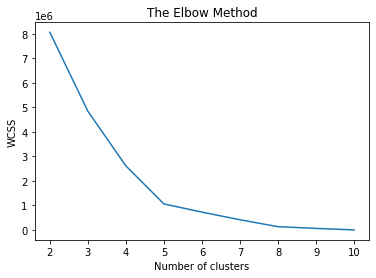

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(5, 3))
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(2,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.annotate(xy=(5,2.5),xytext = (5,3.5),s='Elbow', arrowprops={})

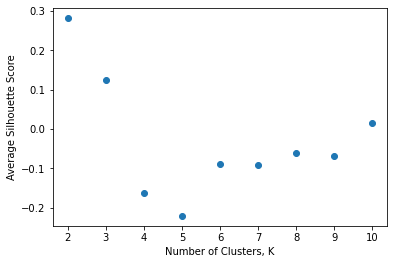

In [27]:
# checking the best number of clusters (silhouette method)
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
sil=[]
for K in range(2,11):
   
    kmeans = KMeans(n_clusters=K)
    
    kmeans.fit(normalize(X))
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

plt.scatter(range(2,11),sil,marker = 'o');
plt.xlabel('Number of Clusters, K');
plt.ylabel('Average Silhouette Score');

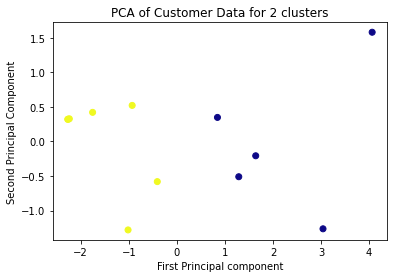

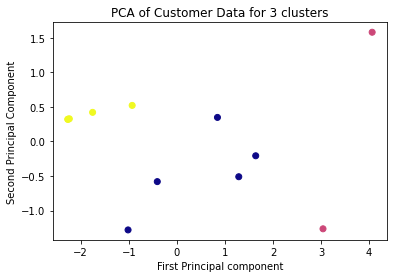

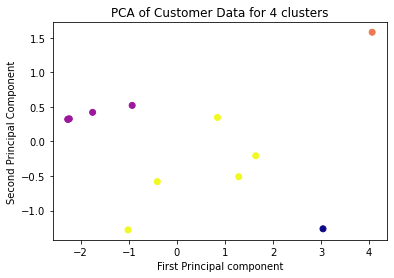

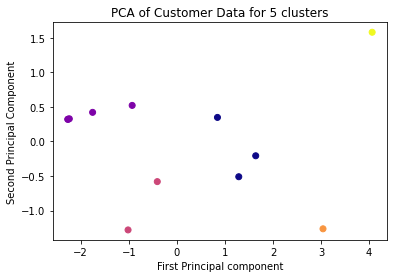

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
for K in range(2,6):
    model = KMeans(n_clusters = K)
    model.fit_predict(X)
    pred=model.predict(X)
    #rescaling the data: scaled
    features = X
    scaler = StandardScaler()
    scaler.fit(features)
    scaled=scaler.transform(features)
    #initiating PCA classifier: pca
    pca = PCA(n_components=K);
    #fitting the scaled data
    pca.fit(scaled);
    #transforming fitted data into an array: x_pca
    x_pca = pca.transform(scaled)
    #creating a dataframe
    df2=pd.DataFrame({'cluster':pred,'x':x_pca[:,0],'y':x_pca[:,1]})
    df2.head()
    #plotting x,y 
    plt.scatter(df2.x,df2.y,c=df2.cluster,cmap='plasma');
    plt.xlabel('First Principal component');
    plt.ylabel('Second Principal Component');
    plt.title("PCA of Customer Data for {} clusters".format(K));
    plt.show()

In [32]:
clusters = KMeans(2)  # 2 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df['Crime_clusters'] = clusters.labels_
df.sort_values(by=['Crime_clusters'],ascending = True)


,Gainesville Police Districts,Trespass Warning,Theft Petit - Other,Criminal Mischief (misdemeanor),Burglary to Conveyance,Theft Petit - Retail,Crime_clusters
4,5,55.0,107.0,101,268.0,20.0,0
5,6,244.0,323.0,301,501.0,142.0,0
6,7,221.0,262.0,385,617.0,1059.0,0
7,8,7.0,7.0,14,8.0,2.0,0
8,10,281.0,238.0,83,104.0,1514.0,0
9,11,1.0,0.0,2,0.0,0.0,0
11,9,0.0,2.0,1,4.0,0.0,0
0,1,2360.0,1672.0,1491,1314.0,738.0,1
1,2,1449.0,1091.0,1086,1114.0,2497.0,1
2,3,902.0,787.0,848,1130.0,1299.0,1


In [33]:
clusters = KMeans(5)  # 2 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df['Crime_clusters'] = clusters.labels_
df.sort_values(by=['Crime_clusters'],ascending = True)

,Gainesville Police Districts,Trespass Warning,Theft Petit - Other,Criminal Mischief (misdemeanor),Burglary to Conveyance,Theft Petit - Retail,Crime_clusters
4,5,55.0,107.0,101,268.0,20.0,0
5,6,244.0,323.0,301,501.0,142.0,0
7,8,7.0,7.0,14,8.0,2.0,0
9,11,1.0,0.0,2,0.0,0.0,0
11,9,0.0,2.0,1,4.0,0.0,0
2,3,902.0,787.0,848,1130.0,1299.0,1
3,4,880.0,715.0,695,815.0,739.0,1
10,12,964.0,707.0,707,880.0,1477.0,1
0,1,2360.0,1672.0,1491,1314.0,738.0,2
6,7,221.0,262.0,385,617.0,1059.0,3


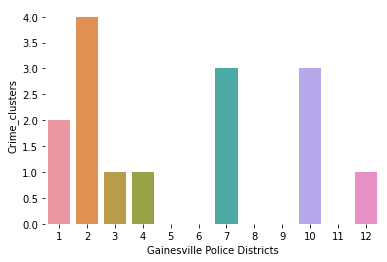

In [35]:
import seaborn as sns
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 5))
f, ax = plt.subplots()
# Load the dataset
stats = df.sort_values([ "Crime_clusters", "Gainesville Police Districts"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="Crime_clusters", x="Gainesville Police Districts", data=df)

sns.despine(left=True, bottom=True)

df.to_csv(r'C:\Users\chunx\crime\tablauekmeancluster.csv', index = None, header=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140:

00:00:08.64


<Figure size 7200x7200 with 0 Axes>

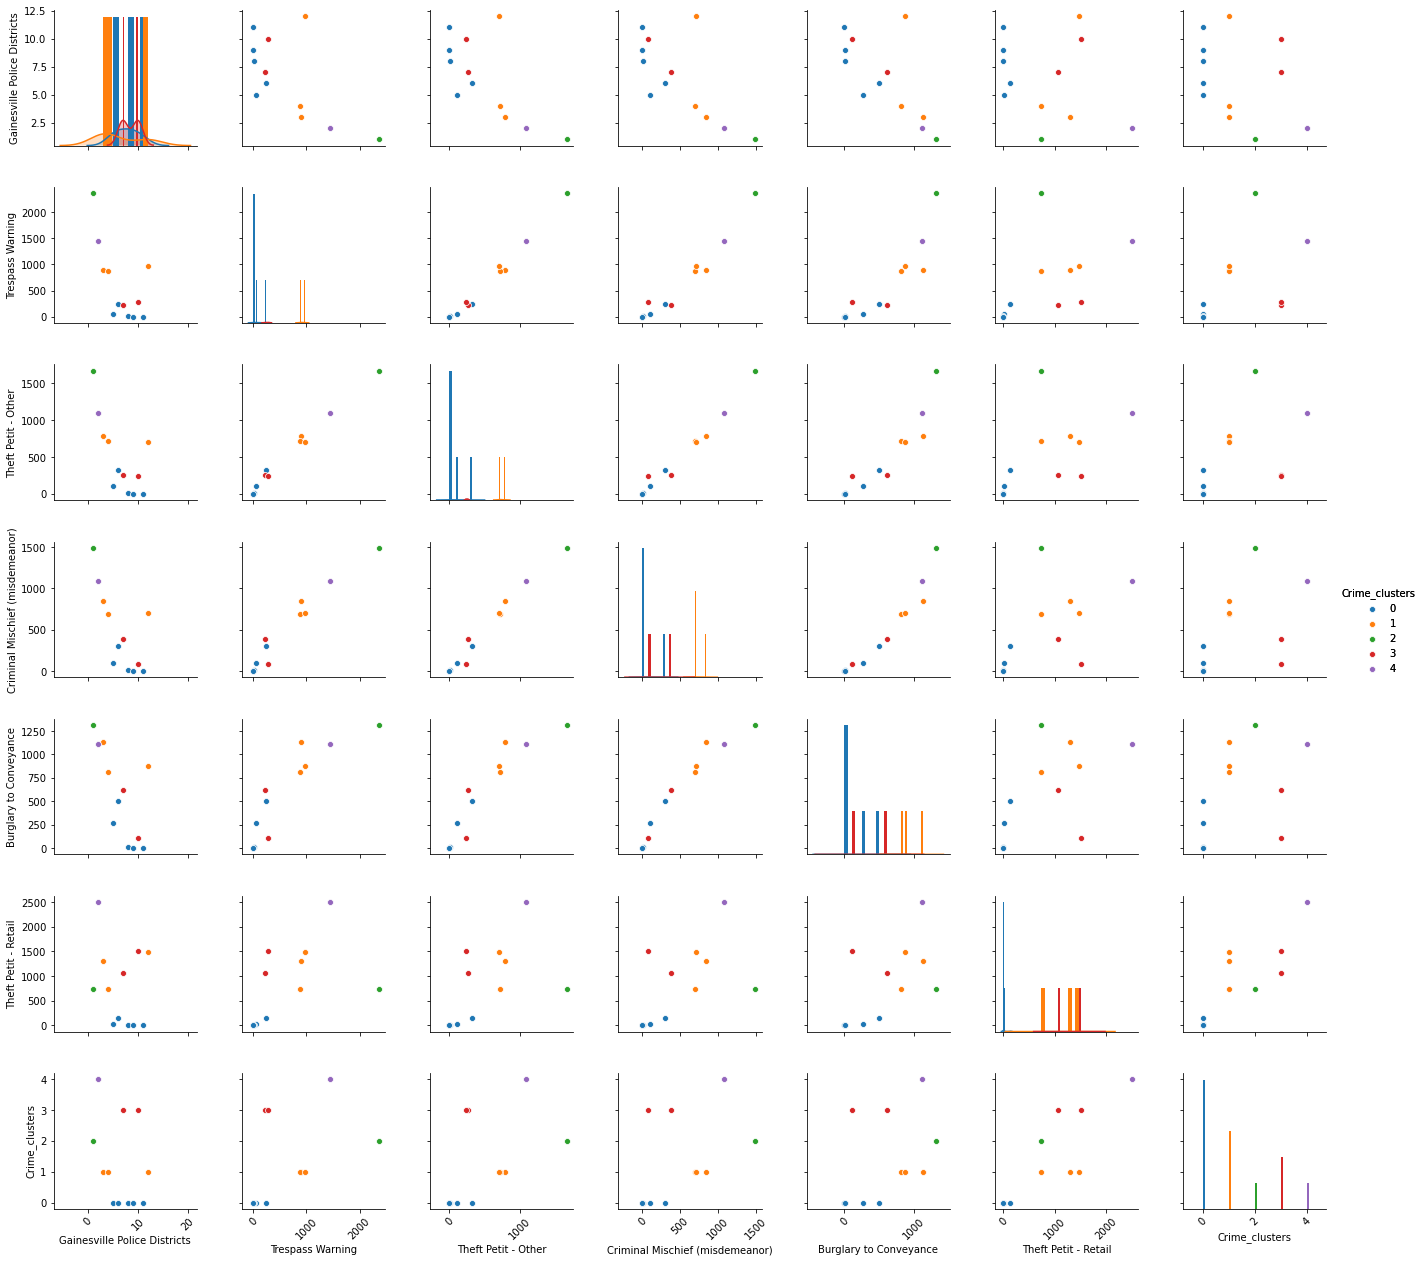

In [36]:
start = time.time()
plt.figure(figsize = (100,100))
g = sns.pairplot(df,  hue="Crime_clusters") 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [37]:
df_clus=df[['Gainesville Police Districts','Crime_clusters']]


In [38]:
df_clus

,Gainesville Police Districts,Crime_clusters
0,1,2
1,2,4
2,3,1
3,4,1
4,5,0
5,6,0
6,7,3
7,8,0
8,10,3
9,11,0


In [192]:
df=pd.read_csv('cityGainCleanpython.csv', header=0)


In [193]:
df.columns

Index(['ID', 'Incident Type', 'Report Hour of Day', 'Report Day of Week',
       'Offense Hour of Day', 'Offense Day of Week', 'Latitude', 'Longitude',
       'Zip Code Boundaries', '2010 Census Tracts', 'Commission Districts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'Oyear',
       'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay'],
      dtype='object')

In [194]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].fillna(0)

In [195]:
set(df['Gainesville Police Districts'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}

In [134]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].astype(int).astype('category').cat.as_ordered()

In [196]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].astype(int)

In [197]:
df_clus.dtypes

Gainesville Police Districts    int64
Crime_clusters                  int32
dtype: object

In [198]:
df=df.merge(df_clus, on='Gainesville Police Districts')

In [199]:
df.head()

,ID,Incident Type,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,...,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay,Crime_clusters
0,220002476,Dcf Investigations,13,Friday,20,Monday,29.681386,-82.303196,4.0,12.0,...,2020-02-14 13,2020-02,2020,1,20,2020,2,14,24,4
1,220002493,Battery (aggravated),18,Friday,17,Friday,29.645793,-82.307266,9.0,5.0,...,2020-02-14 18,2020-02,2020,2,14,2020,2,14,0,4
2,220002496,Warrant Arrest,18,Friday,18,Friday,29.663180,-82.305230,1.0,13.0,...,2020-02-14 18,2020-02,2020,2,14,2020,2,14,0,4
3,220002498,Theft Petit - Retail,16,Friday,0,Saturday,29.661941,-82.300747,9.0,14.0,...,2020-02-14 16,2020-02,2020,1,11,2020,2,14,33,4
4,219020106,Theft Petit - Other,9,Wednesday,12,Tuesday,29.646612,-82.292538,9.0,14.0,...,2019-12-04 09,2019-12,2019,11,26,2019,12,4,8,4


In [200]:
df.to_csv (r'C:\Users\chunx\crime\topclusterswith5label.csv', index = None, header=True)

#df=pd.read_csv('topclusterswith2label.csv', header=0)